In [1]:
import metnum
import pandas as pd 
import numpy as np
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("../data/train.csv")

subset_random_indexes = np.random.choice(data.index.values,10000)

subset_random_indexes

array([30915,  1580, 31784, ..., 16377, 15308, 36331])

In [2]:
train_reduced = data.iloc[subset_random_indexes,:]
y = train_reduced["label"]
X = train_reduced[train_reduced.columns[1:]]

In [3]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

pca = metnum.PCA(19)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

model = metnum.KNNClassifier(6)

model.fit(X_train_PCA, y_train)

resultados = model.predict(X_test_PCA)

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from seaborn import heatmap
%matplotlib inline
cMatrix = confusion_matrix(y_test,resultados)

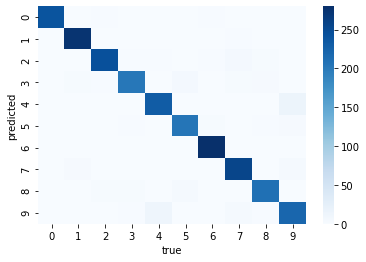

In [62]:
ax = plt.axes()
hm = heatmap(cMatrix, ax= ax, cmap="Blues")

ax.set_xlabel("true")

ax.set_ylabel("predicted")
plt.savefig("./graphics/confusion.jpg")

In [14]:
precisiones = []
recalls = []
for k in range(10):
    precisiones.append(cMatrix[k][k]/(cMatrix[k].sum()))
    recalls.append(cMatrix[k][k]/(cMatrix[:,k].sum()))

In [21]:
recalls = pd.Series(recalls)
precisiones = pd.Series(precisiones)
precision_promedio = precisiones.mean()
recall_promedio = recalls.mean()

In [65]:
resultados = pd.DataFrame([precisiones,recalls]).T
resultados.columns = ["precision", "recall"]
index = resultados.index
index.name = "clase"
index = [str(i) for i in range(10)]
index.append("promedio")
resultados

,precision,recall
clase,,
0,0.983673,0.983673
1,0.985663,0.964912
2,0.935361,0.968504
3,0.918552,0.948598
4,0.920635,0.931727
5,0.949074,0.944700
6,0.996441,0.962199
7,0.955556,0.934783
8,0.929515,0.950450


array([241, 275, 246, 203, 232, 205, 280, 258, 211, 221])

In [47]:
promedios = pd.Series([resultados["precision"].mean(),resultados["recall"].mean()])
promedios.index = ["precision","recall"]
promedios.name = "promedio"
resultados = resultados.append(promedios)

In [48]:
import dataframe_image as dfi

dfi.export(resultados, "./graphics/recalls-presiciones.jpg")